### Libraries:

In [32]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Reading Tables
### no need fortrain and test in clustering

In [34]:
datas_Test = pd.read_table('UniqueDataSet\drugsComTest_raw.tsv')
datas_Train = pd.read_table('UniqueDataSet\drugsComTrain_raw.tsv')



### Preprocessing

In [36]:
datas = pd.concat([datas_Test,datas_Train],axis = 0)

datas = datas.drop(["Unnamed: 0","review","date"],axis = 1).dropna()
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
Z=le.fit_transform(datas.iloc[:,0:1])
Y=le.fit_transform(datas.iloc[:,1:2])
X = datas.iloc[:,2:]
df=pd.DataFrame(data=Z,index=range(213869),columns=['drugName'])
df1= pd.DataFrame(data=Y,index=range(213869),columns=['condition'])
df=df.reset_index(drop=True)
df1=df1.reset_index(drop=True)
X=X.reset_index(drop=True)


C:\Users\mbatu\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Concating Dataframe

In [38]:

result1 = pd.concat([df,df1],axis = 1)
result = pd.concat([result1,X],axis = 1)
resultArr = result.iloc[:].values


### Plotting Dataset

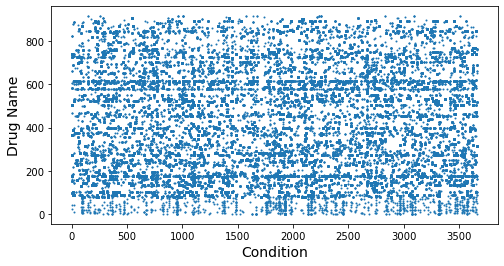

In [40]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("Condition", fontsize=14)
    plt.ylabel("Drug Name", fontsize=14, rotation=90)

plt.figure(figsize=(8, 4))
plot_clusters(resultArr)
plt.show()

### WCSS of K-Means

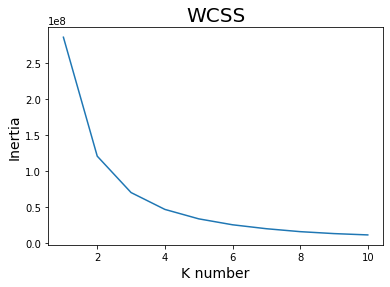

In [42]:
from sklearn.cluster import KMeans
bestKFind = []
for i in range(1,11):
    kmeans = KMeans (n_clusters = i, init='k-means++', random_state= 37)
    kmeans.fit(X)
    bestKFind.append(kmeans.inertia_)

plt.plot(range(1,11),bestKFind)
plt.xlabel("K number", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.title("WCSS",fontsize=20)
plt.show()

### Kmeans method

In [44]:
kmeans = KMeans(n_clusters = 4,init='k-means++', random_state= 37)
kmeans.fit(result)

KMeans(n_clusters=4, random_state=37)

### Prinitng start points

In [46]:
print(kmeans.cluster_centers_)

[[1238.0432115   297.53457297    6.68750706   23.05591523]
 [3191.56343465  412.07453886    7.12463875   32.51734973]
 [ 436.05787518  411.41234608    7.24509918   32.20757494]
 [2139.50732913  377.87101342    6.96678166   26.03924434]]


### After seeing the WCSS table we should use our max center is 4

### Prediction

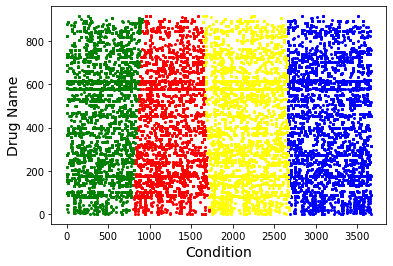

In [49]:
kmeans = KMeans (n_clusters = 4, init='k-means++', random_state= 37)
pred = kmeans.fit_predict(result)

plt.scatter(resultArr[pred==0,0],resultArr[pred==0,1],s=4, c='red')
plt.scatter(resultArr[pred==1,0],resultArr[pred==1,1],s=4, c='blue')
plt.scatter(resultArr[pred==2,0],resultArr[pred==2,1],s=4, c='green')
plt.scatter(resultArr[pred==3,0],resultArr[pred==3,1],s=4, c='yellow')
plt.ylabel("Drug Name", fontsize=14)
plt.xlabel("Condition", fontsize=14)
plt.show()

### Hierarcy couldn't be done cause of the memory overflow

from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
pred = ac.fit_predict(result)
print(pred)

plt.scatter(resultArr[pred==0,0],resultArr[pred==0,1],s=4, c='red')
plt.scatter(resultArr[pred==1,0],resultArr[pred==1,1],s=4, c='blue')
plt.scatter(resultArr[pred==2,0],resultArr[pred==2,1],s=4, c='green')
plt.scatter(resultArr[pred==3,0],resultArr[pred==3,1],s=4, c='yellow')
plt.title('HC')
plt.show()

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()